# Projet STATISTIQUES - Étude de données météo

Groupe : Choquet Laura, Oncle Valentin, Laisné Paul, Maubian Joséphine, Regaieg Mohamed

## Exploration et présentation des données

Les données utilisées dans ce projet sont des données météorologiques provenant de la source suivante : 
https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/donnees-synop-essentielles-omm/exports/csv?lang=fr&qv1=(date%3A%5B2015-08-03T22%3A00%3A00Z%20TO%202025-09-03T21%3A59%3A59Z%5D)&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B


In [2]:
# Chargement du jeu de données
data <- read.csv("../data/station_7005_obs.csv", sep = ",") # Remplacer le lien par celui de votre jeu de données.

In [3]:
# Informations générales 
cat(strrep("-", 50), "\n")
cat("Dimension du dataset\n")
cat(strrep("-", 50), "\n")
dim_data <- dim(data)
cat("Nb d'observations :", dim_data[1], "\n")
cat("Nb de variables :", dim_data[2], "\n")
cat(strrep("-", 50), "\n")
cat("Liste des variables :\n")
cat(strrep("-", 50), "\n")
print(names(data))
# cat(strrep("-", 50), "\n")
# cat("Summary of the dataset\n")
# cat(strrep("-", 50), "\n")
# print(summary(data))


-------------------------------------------------- 
Dimension du dataset
-------------------------------------------------- 
Nb d'observations : 29191 
Nb de variables : 62 
-------------------------------------------------- 
Liste des variables :
-------------------------------------------------- 
 [1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                     

La sortie de la fonction summary() nous permet au préalable de constater que pour certaines variables il y a énormément de données manquantes. Afin d'avoir une meilleure visibilité sur le jeu de données et de réduire le nombre de variables sur lesquelles nous allons travaillé, nous avons d'abord écarté les variables non exploitables qui contiennent plus de 20 % de données manquantes.

-------------------------------------------------- 
Analyse des données manquantes (en pourcentage)
-------------------------------------------------- 


                                           ID.OMM.station 
                                                    0.000 
                                                     Date 
                                                    0.000 
                                   Pression.au.niveau.mer 
                                                    0.041 
                        Variation.de.pression.en.3.heures 
                                                    0.055 
                            Type.de.tendance.barométrique 
                                                    0.055 
                            Direction.du.vent.moyen.10.mn 
                                                    0.130 
                              Vitesse.du.vent.moyen.10.mn 
                                                    0.130 
                                              Température 
                                                    0.003 
                                           Point.de.rosé

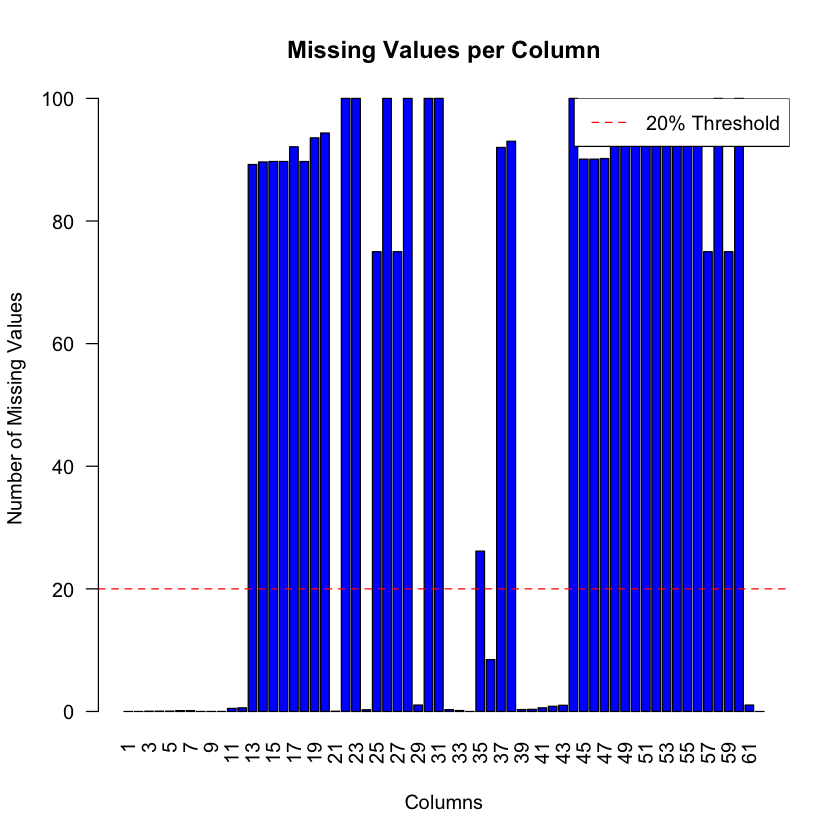

In [4]:
# Analyse des données manquantes (en pourcentage)
missing_values_percent <- colMeans(is.na(data)) * 100
cat(strrep("-", 50), "\n")
cat("Analyse des données manquantes (en pourcentage)\n")
cat(strrep("-", 50), "\n")
print(round(missing_values_percent, 3))

# Affichage dans un histogramme des valeurs manquantes par colonne
par(bg = "white")
barplot(missing_values_percent, main = "Missing Values per Column", 
        xlab = "Columns", ylab = "Number of Missing Values", col = "blue", las = 2,
        names.arg = seq_along(missing_values_percent))
# Rajouter une ligne horizontale pour indiquer un seuil de tolérance
abline(h = 20, col = "red", lty = 2)
legend("topright", legend = "20% Threshold", col = "red", lty = 2)


In [5]:
# Suppression de colonnes avec plus de 20% de données manquantes
threshold_ratio <- 0.2
threshold <- threshold_ratio * nrow(data)
missing_values <- colSums(is.na(data))
columns_to_drop <- names(missing_values[missing_values > threshold])
data_cleaned <- data[, !(names(data) %in% columns_to_drop)]
cat(strrep("-", 50), "\n")
cat("Colonnes supprimées (plus de 20% de données manquantes) :\n")
cat(strrep("-", 50), "\n")
print(columns_to_drop)
cat(strrep("-", 50), "\n")
cat("Dimension du dataset après suppression des colonnes :\n")
cat(strrep("-", 50), "\n")
dim_data_cleaned <- dim(data_cleaned)
cat("Nb d'observations :", dim_data_cleaned[1], "\n")
cat("Nb de variables :", dim_data_cleaned[2], "\n")
cat(strrep("-", 50), "\n")
cat("Liste des variables après nettoyage :\n")
print(names(data_cleaned))

-------------------------------------------------- 
Colonnes supprimées (plus de 20% de données manquantes) :
-------------------------------------------------- 
 [1] "Temps.passé.1"                                       
 [2] "Temps.passé.2"                                       
 [3] "Nebulosité.totale"                                   
 [4] "Nébulosité..des.nuages.de.l..étage.inférieur"        
 [5] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"  
 [6] "Type.des.nuages.de.l.étage.inférieur"                
 [7] "Type.des.nuages.de.l.étage.moyen"                    
 [8] "Type.des.nuages.de.l.étage.supérieur"                
 [9] "Niveau.barométrique"                                 
[10] "Géopotentiel"                                        
[11] "Température.minimale.sur.12.heures"                  
[12] "Température.minimale.sur.24.heures"                  
[13] "Température.maximale.sur.12.heures"                  
[14] "Température.maximale.sur.24.heures"                 

-------------------------------------------------- 
Nb d'observations : 29191 
Nb de variables : 26 
-------------------------------------------------- 
Liste des variables après nettoyage :
 [1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Pression.station"      

In [6]:
# Récupération des variables numériques
# On considère les variables date, ID.OMM.station comme catégorielle
categorical_var = c("Date", "ID.OMM.station", "Point.de.rosée", "Pression.au.niveau.mer", "Periode.de.mesure.de.la.rafale", "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol", "mois_de_l_annee", "Température.minimale.du.sol.sur.12.heures", "Rafales.sur.une.période", "Température.minimale.du.sol.sur.12.heures..en..C.", "Rafale.sur.les.10.dernières.minutes", "Précipitations.dans.les.6.dernières.heures", "Précipitations.dans.les.12.dernières.heures", "Précipitations.dans.la.dernière.heure", "Type.de.tendance.barométrique")
data_numeric <- data_cleaned[, !(names(data_cleaned) %in% categorical_var)]

cat(strrep("-", 50), "\n")
cat("Variables numériques :\n")
cat(strrep("-", 50), "\n")
cat("Nb de variables :", length(names(data_numeric)), "\n")
print(names(data_numeric))
cat(strrep("-", 50), "\n")


-------------------------------------------------- 
Variables numériques :
-------------------------------------------------- 
Nb de variables : 11 
 [1] "Variation.de.pression.en.3.heures"          
 [2] "Direction.du.vent.moyen.10.mn"              
 [3] "Vitesse.du.vent.moyen.10.mn"                
 [4] "Température"                                
 [5] "Humidité"                                   
 [6] "Visibilité.horizontale"                     
 [7] "Temps.présent"                              
 [8] "Pression.station"                           
 [9] "Variation.de.pression.en.24.heures"         
[10] "Précipitations.dans.les.3.dernières.heures" 
[11] "Précipitations.dans.les.24.dernières.heures"
-------------------------------------------------- 


Indices et noms des colonnes :
1 : Variation.de.pression.en.3.heures 
2 : Direction.du.vent.moyen.10.mn 
3 : Vitesse.du.vent.moyen.10.mn 
4 : Température 
5 : Humidité 
6 : Visibilité.horizontale 
7 : Temps.présent 
8 : Pression.station 
9 : Variation.de.pression.en.24.heures 
10 : Précipitations.dans.les.3.dernières.heures 
11 : Précipitations.dans.les.24.dernières.heures 


corrplot 0.95 loaded



-------------------------------------------------- 
10 paires de variables les plus corrélées :
-------------------------------------------------- 
1. Humidité et Visibilité.horizontale : -0.514
2. Température et Humidité : -0.508
3. Variation.de.pression.en.3.heures et Variation.de.pression.en.24.heures : 0.489
4. Précipitations.dans.les.3.dernières.heures et Précipitations.dans.les.24.dernières.heures : 0.444
5. Visibilité.horizontale et Temps.présent : -0.426
6. Temps.présent et Précipitations.dans.les.3.dernières.heures : 0.393
7. Pression.station et Précipitations.dans.les.24.dernières.heures : -0.36
8. Pression.station et Variation.de.pression.en.24.heures : 0.34
9. Température et Visibilité.horizontale : 0.321
10. Humidité et Temps.présent : 0.302
-------------------------------------------------- 


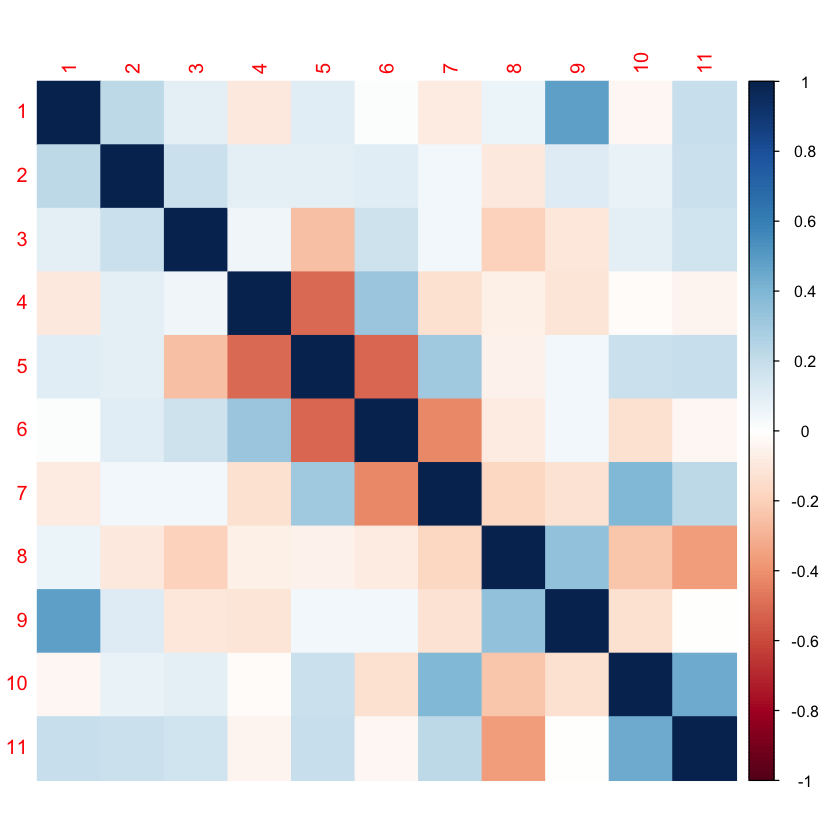

In [7]:
# Affichage graphique de la matrice de corrélation
# Afficher les indices et les noms des colonnes
cat("Indices et noms des colonnes :\n")
for (i in seq_along(names(data_numeric))) {
    cat(i, ":", names(data_numeric)[i], "\n")
}
# Remplacer les noms des colonnes par leurs indices dans la matrice de corrélation
library(corrplot)
par(bg = "white")

cor_matrix <- cor(data_numeric, use = "pairwise.complete.obs")
colnames(cor_matrix) <- rownames(cor_matrix) <- seq_len(ncol(cor_matrix))
corrplot(cor_matrix, method = "color")

# Print les 5 paires de variables les plus corrélées
cor_matrix[lower.tri(cor_matrix, diag = TRUE)] <- NA
cor_values <- as.data.frame(as.table(cor_matrix))
cor_values <- na.omit(cor_values)
cor_values <- cor_values[order(-abs(cor_values$Freq)), ]
cat(strrep("-", 50), "\n")
cat("10 paires de variables les plus corrélées :\n")
cat(strrep("-", 50), "\n")
for (i in 1:10) {
    var1_index <- cor_values[i, 1]
    var2_index <- cor_values[i, 2]
    var1_name <- names(data_numeric)[as.numeric(var1_index)]
    var2_name <- names(data_numeric)[as.numeric(var2_index)]
    cat(paste0(i, ". ", var1_name, " et ", var2_name, " : ", round(cor_values[i, 3], 3), "\n"))
}
cat(strrep("-", 50), "\n")

## Calcul et étude d'un estimateur

## Tests sur un paramètre et ANOVA

## Régression et corrélation

## ACP et PLS

In [8]:
length(names(data_numeric))

[1] 11

In [9]:
library(pls)
?pls


Attachement du package : ‘pls’


L'objet suivant est masqué depuis ‘package:corrplot’:

    corrplot


L'objet suivant est masqué depuis ‘package:stats’:

    loadings




pls                    package:pls                     R Documentation

_P_a_r_t_i_a_l _L_e_a_s_t _S_q_u_a_r_e_s _a_n_d _P_r_i_n_c_i_p_a_l _C_o_m_p_o_n_e_n_t _R_e_g_r_e_s_s_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Multivariate regression methods Partial Least Squares Regression
     (PLSR), Principal Component Regression (PCR) and Canonical Powered
     Partial Least Squares (CPPLS).

_A_u_t_h_o_r(_s):

     *Maintainer*: Kristian Hovde Liland
     <mailto:kristian.liland@nmbu.no>

     Authors:

        • Bjørn-Helge Mevik <mailto:b-h@mevik.net>

        • Ron Wehrens

     Other contributors:

        • Paul Hiemstra [contributor]

_S_e_e _A_l_s_o:

     Useful links:

        • <https://github.com/khliland/pls>

        • Report bugs at <https://github.com/khliland/pls/issues>


Data: 	X dimension: 28598 10 
	Y dimension: 28598 1
Fit method: kernelpls
Number of components considered: 10

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           6.332        6    5.955     5.94    5.885    5.638    5.327
adjCV        6.332        6    5.955     5.94    5.885    5.645    5.327
       7 comps  8 comps  9 comps  10 comps
CV       5.317    5.253    5.243     5.238
adjCV    5.317    5.253    5.243     5.238

TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X    97.03    98.75    99.96    99.97    99.99   100.00   100.00   100.00
y    10.20    11.57    12.01    13.64    20.53    29.26    29.52    31.21
   9 comps  10 comps
X   100.00    100.00
y    31.47     31.61


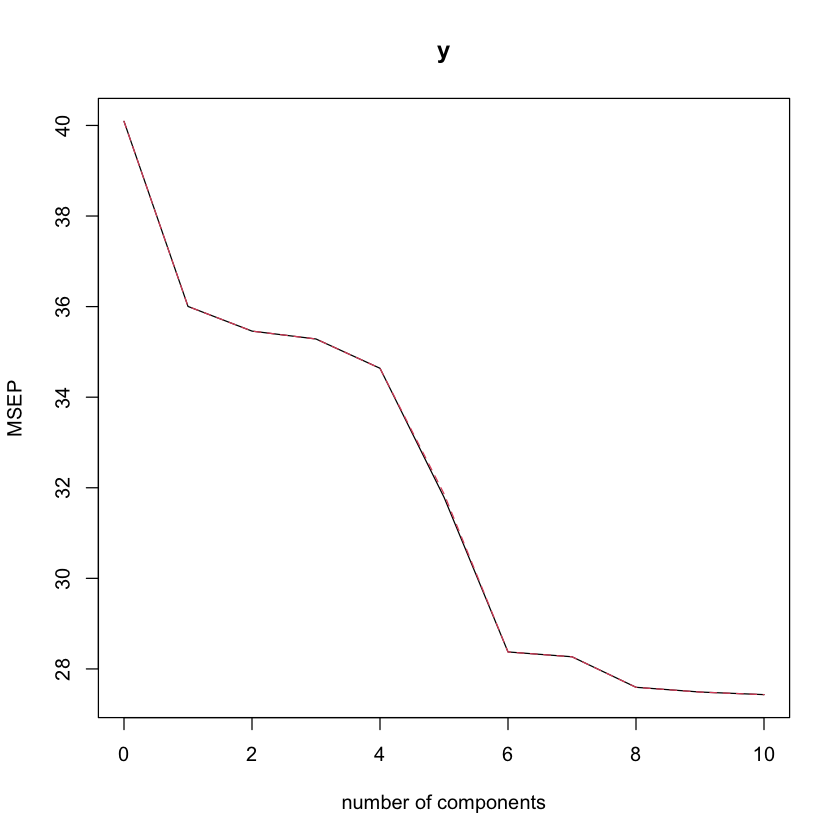

, , 10 comps

                                                                    y
as.matrix(X)Variation.de.pression.en.3.heures           -0.0004778506
as.matrix(X)Direction.du.vent.moyen.10.mn                0.0115652226
as.matrix(X)Vitesse.du.vent.moyen.10.mn                 -0.4311919504
as.matrix(X)Humidité                                    -0.2294936557
as.matrix(X)Visibilité.horizontale                       0.0000540243
as.matrix(X)Temps.présent                                0.0010589620
as.matrix(X)Pression.station                            -0.0002781789
as.matrix(X)Variation.de.pression.en.24.heures          -0.0009932858
as.matrix(X)Précipitations.dans.les.3.dernières.heures   0.3484268835
as.matrix(X)Précipitations.dans.les.24.dernières.heures  0.0238016642

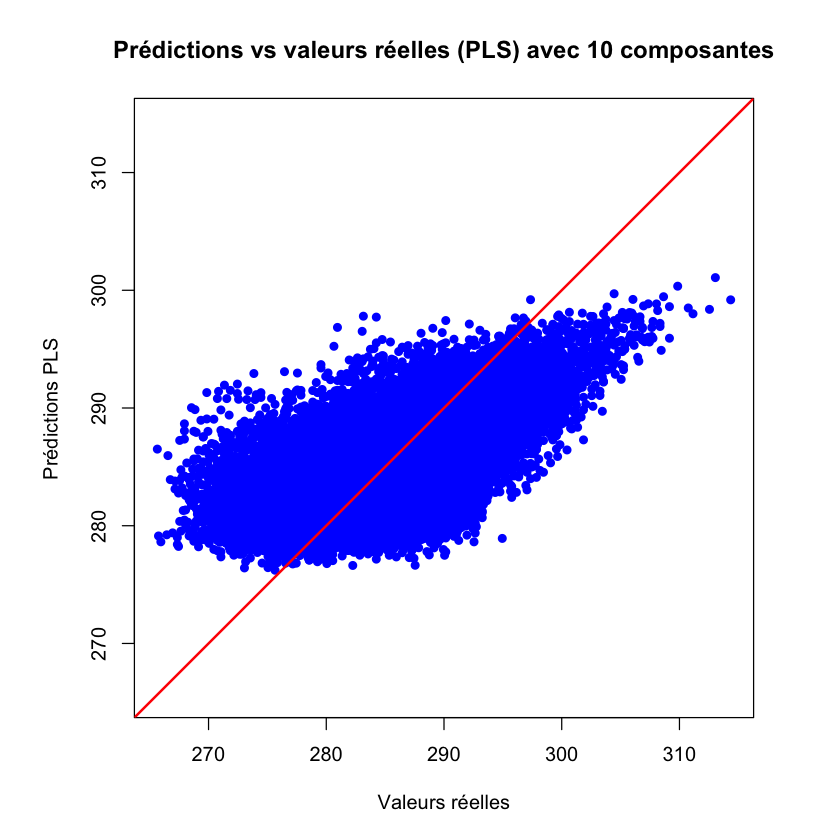

In [15]:


# Utiliser le nom exact de la variable cible
target_var <- "Température"


# Créer un data.frame avec toutes les variables nécessaires
df_pls <- data_numeric[, c(target_var, setdiff(names(data_numeric), target_var))]
df_pls <- na.omit(df_pls) # Retirer toutes les lignes avec NA

y <- df_pls[[target_var]]
X <- df_pls[, setdiff(names(df_pls), target_var), drop = FALSE]

# Régression PLS avec validation croisée
pls_model <- plsr(y ~ as.matrix(X), validation = "CV")

# Résumé du modèle
summary(pls_model)

# Sélection du nombre optimal de composantes
par(bg = 'white')
validationplot(pls_model, val.type = "MSEP")

# Trouver le nombre optimal de composantes
opt_ncomp <- which.min(pls_model$validation$PRESS)

ncomp = 7

# Prédictions
pred <- predict(pls_model, ncomp = opt_ncomp)
pred_vec <- as.vector(pred[,1,1])

# Plot prédiction vs ground truth
par(pty = "s")
plot_lim <- range(c(y, pred_vec))
plot(y, pred_vec, 
     xlab = "Valeurs réelles", 
     ylab = "Prédictions PLS", 
     main = paste("Prédictions vs valeurs réelles (PLS) avec", opt_ncomp, "composantes"), 
     col = "blue", pch = 16,
     xlim = plot_lim, ylim = plot_lim)

abline(a = 0, b = 1, col = "red", lwd = 2)

# Affichage des coefficients et les indices des variables dans X
coef(pls_model, ncomp = opt_ncomp)


In [11]:
# Récupérer les loadings (combinaisons linéaires) des composantes PLS
loadings_pls <- loadings(pls_model)

# Afficher les loadings pour les premières composantes
print("Loadings des composantes PLS:")
print(loadings_pls[, 1:min(ncomp)])

# Boucle pour chaque composante
for (i in 1:min(ncomp)) {
        # Pour voir comment chaque variable contribue à une composante spécifique
        cat("\nContribution des variables à la composante", i, ":\n")
        comp1_loadings <- loadings_pls[, i]
        names(comp1_loadings) <- colnames(X)
        print(sort(abs(comp1_loadings), decreasing = TRUE))

        # Afficher graphiquement les loadings de la première composante
        par(bg = 'white')
        barplot(comp1_loadings, 
                main = paste("Loadings de la Composante", i, "PLS"),
                las = 2, 
                col = "lightblue",
                cex.names = 0.7)

}

# # Pour récupérer les scores (valeurs des composantes pour chaque observation)
# scores_pls <- scores(pls_model)
# cat("\nDimensions des scores:", dim(scores_pls), "\n")

# # Exemple : afficher la première composante pour les 10 premières observations
# cat("Première composante pour les 10 premières observations:\n")
# print(scores_pls[1:10, 1])

ERROR: Error: objet 'pls_model' introuvable


## Clustering